Problem 1:

Build a diagram of a TRIGA-like reactor core in matplotlib. The TRIGA-like model can constructed as a grouping of three different pins: fueled pins where the fuel has r=3.63cm, and the outer radius of the pin is r=3.73cm. Assume there is no air gap between the fuel and the cladding.  Control rods can be modeled as an additional pin filled with B4C. Assume the radius of b4c fill is r=3.58cm and the outer radius of the pin is 3.73cm. The final pin is a solid graphite slug with an outer radius of r=3.73cm. TRIGA cores are constructed of concentric rings of pins. In a ring, assume each pin is equally spaced in the ring. Rings are spaced 8cm apart from one another. The outermost ring is all graphite pins. The control rods all exist in ring 3 and are equally spaced from each other. All other pins are fuel. State any assumptions you make clearly.

| Ring Number | Ring Radius (cm) | Pins in ring |
| -------- | -------- | -------- |
| 1 | 0 | 1 |
| 2 | 8 | 6 |
| 3 | 16 | 12 |
| 4 | 24 | 18 |
| 5 | 32 | 24 |

**Assumptions made for the TRIGA Core Model:**

1.  **Ring 1 (Center Pin):** The prompt states "All other pins are fuel" (besides graphite in Ring 5 and control rods in Ring 3). I assumed the single central pin in Ring 1 is a **Fuel Pin**.
2.  **Control Rod Count:** The prompt states control rods are in Ring 3 and "equally spaced". It does not specify a number. I assumed a standard configuration of **3 Control Rods** in Ring 3, spaced evenly (120 degrees apart).
3.  **Colors:** I assigned arbitrary but distinct colors to represent the materials:
    * Red = Fuel
    * Blue = Boron Carbide (B4C)
    * Grey = Graphite
    * Black = Cladding

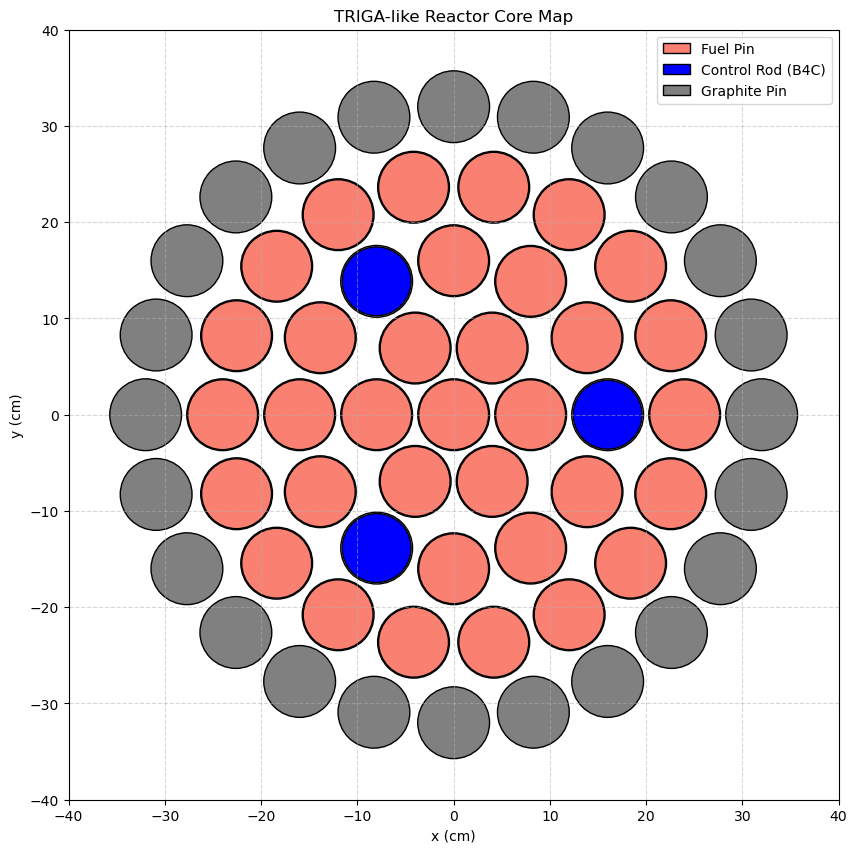

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# --- Parameters ---

#Pin Dimensions (cm)
r_pin_outer = 3.73
r_fuel = 3.63
r_b4c = 3.58

# Ring Data
# Ring Number: [Radius (cm), Number of Pins]
rings_data = {
    1: [0, 1],
    2: [8, 6],
    3: [16, 12],
    4: [24, 18],
    5: [32, 24]
}

# --- Plotting Setup ---

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect('equal') #Ensures pins look like circles, not ovals
ax.set_title("TRIGA-like Reactor Core Map")
ax.set_xlabel("x (cm)")
ax.set_ylabel("y (cm)")

#Limits for the plot window
limit = 40
ax.set_xlim(-limit, limit)
ax.set_ylim(-limit, limit)


# --- Loop through Rings ---

for ring_num, data in rings_data.items():
    ring_radius = data[0]
    num_pins = data[1]
    
    # Calculate angle step (360 degrees / number of pins)
    # Convert to radians for numpy
    if num_pins > 1:
        thetas = np.linspace(0, 2*np.pi, num_pins, endpoint=False)
    else:
        thetas = [0] #Special case for center pin
        
    #Loop through each pin location in the current ring
    for i, theta in enumerate(thetas):
        
        #Calculate x, y coordinates
        #We start at 12 o'clock (pi/2) or 3 o'clock (0). 
        #Standard math uses 0 as 3 o'clock.
        x = ring_radius * np.cos(theta)
        y = ring_radius * np.sin(theta)
        
        # --- Determine Pin Type ---
        
        #Default to Fuel
        pin_type = "Fuel"
        
        #Condition 1: Outermost ring (Ring 5) is Graphite
        if ring_num == 5:
            pin_type = "Graphite"
            
        # Condition 2: Control Rods in Ring 3
        # Assumption: 3 Control rods, equally spaced. 
        # Since Ring 3 has 12 pins, we place them at indices 0, 4, and 8.
        elif ring_num == 3 and (i == 0 or i == 4 or i == 8):
            pin_type = "Control"
            
        
        # --- Draw the Pin ---
        
        if pin_type == "Graphite":
            # Solid graphite pin
            # Add outer circle (Pin outer radius)
            circle = patches.Circle((x, y), r_pin_outer, facecolor='gray', edgecolor='black')
            ax.add_patch(circle)
            
        elif pin_type == "Control":
            # Control Rod (Clad + B4C)
            # 1. Clad (Outer)
            clad = patches.Circle((x, y), r_pin_outer, facecolor='silver', edgecolor='black')
            ax.add_patch(clad)
            # 2. B4C (Inner)
            absorber = patches.Circle((x, y), r_b4c, facecolor='blue', edgecolor='black')
            ax.add_patch(absorber)
            
        else: # Fuel
            # Fuel Pin (Clad + Fuel)
            # 1. Clad (Outer)
            clad = patches.Circle((x, y), r_pin_outer, facecolor='silver', edgecolor='black')
            ax.add_patch(clad)
            # 2. Fuel (Inner)
            fuel = patches.Circle((x, y), r_fuel, facecolor='salmon', edgecolor='black')
            ax.add_patch(fuel)

# --- Legend ---
legend_elements = [
    patches.Patch(facecolor='salmon', edgecolor='black', label='Fuel Pin'),
    patches.Patch(facecolor='blue', edgecolor='black', label='Control Rod (B4C)'),
    patches.Patch(facecolor='gray', edgecolor='black', label='Graphite Pin')
]
ax.legend(handles=legend_elements, loc='upper right')

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Problem 5.1:

Write a Python dictionary that contains the key:value pairs that have for a key the name of the common subatomic particles (i.e., proton, neutron, and electron) and the value the mass of the particle in kilograms.

In [11]:
particles = {
    "proton": 1.6726e-27,
    "neutron": 1.6749e-27,
    "electron": 9.1094e-31
}

# Print the dictionary to verify
print("Particle Mass Dictionary:")
print(particles)

Particle Mass Dictionary:
{'proton': 1.6726e-27, 'neutron': 1.6749e-27, 'electron': 9.1094e-31}


Problem 5.4:

Integrate the function $f (x, y, z) = exp(−z^2) sin(x) sin(y)$ over the (x, y, z) range [0, π] × [0, π] × [−4, 4] using 10, 100, and 1000 intervals.

In [15]:
import numpy as np

def integrate_separated(N):
    #Define Ranges
    
    #Integrate x component: sin(x)
    x = np.linspace(0, np.pi, N)
    dx = x[1] - x[0]
    #Riemann Sum (Left Endpoint) for x
    int_x = np.sum(np.sin(x[:-1])) * dx
    
    #Integrate y component: sin(y)
    y = np.linspace(0, np.pi, N)
    dy = y[1] - y[0]
    #Riemann Sum for y
    int_y = np.sum(np.sin(y[:-1])) * dy
    
    #Integrate z component: exp(-z^2)
    z = np.linspace(-4, 4, N)
    dz = z[1] - z[0]
    #Riemann Sum for z
    int_z = np.sum(np.exp(-z[:-1]**2)) * dz
    
    #Combine
    total_integral = int_x * int_y * int_z
    return total_integral

#Run for 10, 100, and 1000 intervals
intervals = [10, 100, 1000]

print(f"{'Intervals':<15} {'Calculated Integral':<20}")
print("-" * 35)

for N in intervals:
    result = integrate_separated(N)
    print(f"{N:<15} {result:.5f}")

#Analytical solution for comparison
#Int(sin x) from 0 to pi = 2
#Int(sin y) from 0 to pi = 2
#Int(exp(-z^2)) from -4 to 4 approx sqrt(pi) * erf(4) approx 1.772
exact_val = 2 * 2 * 1.77245
print("-" * 35)
print(f"{'Exact (Approx)':<15} {exact_val:.5f}")

Intervals       Calculated Integral 
-----------------------------------
10              6.94622
100             7.08863
1000            7.08980
-----------------------------------
Exact (Approx)  7.08980


Programming Project 5.1 - Plutonium Decay Change:

Consider the plutonium decay chain from Pu-239 to stable Pb-207, as shown below. Construct a dictionary with the keys are A-X where A is the mass number of the nuclide and X is the atomic symbol for the nuclide. For example one key is 239-Pu. The value for the aforementioned keys should be a dictionary with key:value pairs given by:

• key: half-life, value: the half-life of the decay in seconds,

• key: decay_mode, value: the decay mode (i.e., alpha, beta, or stable in this case), and

• key: mass, value: the mass of the nuclide.

Problem 6.1:

Write an assert statement that guarantees a variable n is less than 100 and is positive.

In [21]:
#Test variable n (change this value to test the assert)
n = -1

#Assert that n is positive and less than 100
assert 0 < n < 100, "Error: n must be between 0 and 100"

print(f"Assertion passed. n is {n}")

AssertionError: Error: n must be between 0 and 100

Problem 6.3:

Write a function called soft_equivalence that takes as input 3 parameters: a, b, and tol. The function should return True if the absolute difference between a and b is less than tol, and return False otherwise. The parameter tol should be an optional parameter with a default value of 10e−6.

In [23]:
def soft_equivalence(a, b, tol=10e-6):
    #Calculate the absolute difference between a and b
    diff = abs(a - b)
    
    #Check if the difference is less than the tolerance
    if diff < tol:
        return True
    else:
        return False

#Test Cases to verify
val1 = 1.000005
val2 = 1.000000

#Test with default tolerance (10e-6 = 0.00001)
#Difference is 0.000005, which is < 0.00001, so this should be True
print(f"Test 1 (Default tol): {soft_equivalence(val1, val2)}")

#Test with a stricter tolerance (e.g., 1e-7)
#Difference is 0.000005, which is NOT < 1e-7, so this should be False
print(f"Test 2 (Strict tol):  {soft_equivalence(val1, val2, tol=1e-7)}")

Test 1 (Default tol): True
Test 2 (Strict tol):  False


Problem 6.4:

Create a list of tests you would perform to test a function solve(A,b) that returns the solution to the linear system Ax = b. You do not need to write any code, just describe the tests, either in equations and/or words.

To verify the solver is working correctly, I would perform the following tests:

1.  **Identity Matrix Test**
    * **Input:** $A = I$ (Identity matrix), $b$ is any random vector.
    * **Expected Output:** The solution $x$ should be exactly equal to $b$.
    * **Reason:** Since $Ix = b \implies x = b$, this is the simplest baseline check.

2.  **Known Solution Test (Hand Calculation)**
    * **Input:** A simple $2 \times 2$ or $3 \times 3$ system with a known integer solution.
        * Example 1: $2x = 4 \implies x=2$.
        * Example 2: $A = \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$, $b = \begin{bmatrix} 2 \\ 0 \end{bmatrix}$ (Solution is $x = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$).
    * **Expected Output:** The function returns the exact pre-calculated vector.
    * **Reason:** Verifies basic algebraic correctness.

3.  **Zero Vector Test (Homogeneous System)**
    * **Input:** Any non-singular matrix $A$, and $b = [0, 0, \dots, 0]$.
    * **Expected Output:** $x$ should be a vector of all zeros.
    * **Reason:** The only solution to $Ax = 0$ for an invertible matrix is the trivial solution $x = 0$.

4.  **Reversibility Test (Consistency Check)**
    * **Input:** Random non-singular matrix $A$ and random vector $b$.
    * **Action:** Compute $x_{calc} = solve(A, b)$. Then, compute $b_{check} = A \times x_{calc}$.
    * **Expected Output:** $b_{check}$ should be very close to the original input $b$ (within a small tolerance like $10^{-6}$).
    * **Reason:** Checks if the solution satisfies the original equation.

5.  **Singular Matrix Test (Error Handling)**
    * **Input:** A singular matrix $A$ (e.g., a matrix of all ones, or where one row is a multiple of another) and any vector $b$.
    * **Expected Output:** The function should raise an error (or return a specific indicator) stating that a unique solution does not exist.
    * **Reason:** A linear system with a singular matrix has either no solution or infinite solutions; a standard solver should flag this.

6.  **Dimension Mismatch Test**
    * **Input:** Matrix $A$ is $N \times N$, but vector $b$ has length $M$ (where $N \neq M$).
    * **Expected Output:** The function should raise a dimension error.
    * **Reason:** Matrix multiplication is only defined for compatible dimensions.